In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

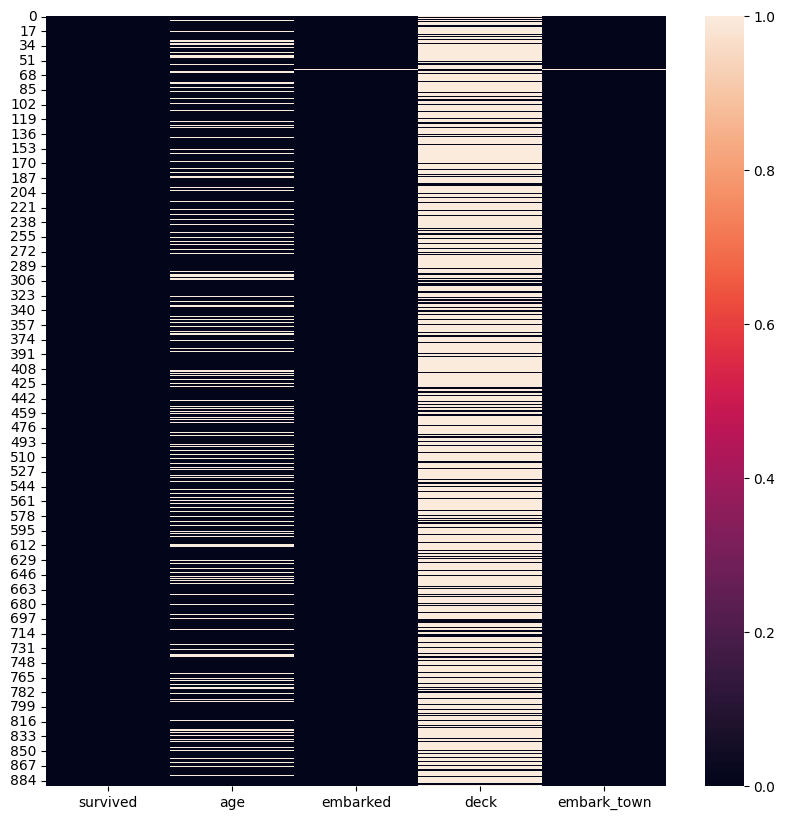

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic[['survived','age','embarked','deck','embark_town']].isna())

# warna biru menandakan data terisi, warna putih menandakan data kosong
# (isna == True maka akan bernilai 1; isna == False maka akan bernilai 0)
# pola missing value yang terlihat adalah MCAR (Missing Completely at Random) pada kolom age dan deck karena tidak terlihat ada pola terhadap variabel lainnya
# perhatikan dengan seksama pada baris 60an, ada pola MNAR (Missing Not a Random) antara embark dan embark_town karena kedua variabel ini berkaitan

In [6]:
# Berdasarkan analisis missing value di atas, dapat kita simpulkan untuk melakukan pairwise deletion pada data embarked dan embark_town karena jumlahnya sedikit (2 baris) dan tidak akan berpengaruh signifikan terhadap analisis data
# Sisa missing value lainnya dapat kita amati lebih lanjut apakah perlu didrop atau tidak
# Kode di bawah hanya contoh, namun bukan implementasi sesungguhnya

# Pairwise deletion
titanic.dropna(subset=['embarked', 'embark_town'], inplace=True)
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [7]:
titanic.shape

(889, 15)

In [8]:
# Contoh SimpleImputer (dalam hal ini menggunakan mean pada data numerik)
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(titanic.select_dtypes('number'))
imp_mean.transform(titanic.select_dtypes('number'))

array([[ 0.       ,  3.       , 22.       ,  1.       ,  0.       ,
         7.25     ],
       [ 1.       ,  1.       , 38.       ,  1.       ,  0.       ,
        71.2833   ],
       [ 1.       ,  3.       , 26.       ,  0.       ,  0.       ,
         7.925    ],
       ...,
       [ 0.       ,  3.       , 29.6420927,  1.       ,  2.       ,
        23.45     ],
       [ 1.       ,  1.       , 26.       ,  0.       ,  0.       ,
        30.       ],
       [ 0.       ,  3.       , 32.       ,  0.       ,  0.       ,
         7.75     ]])

In [9]:
# Contoh SimpleImputer (dalam hal ini menggunakan mode/most_frequent/nilai terbanyak pada data kategorikal)
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(titanic.select_dtypes('object'))
imp_mean.transform(titanic.select_dtypes('object'))

array([['male', 'S', 'man', 'Southampton', 'no'],
       ['female', 'C', 'woman', 'Cherbourg', 'yes'],
       ['female', 'S', 'woman', 'Southampton', 'yes'],
       ...,
       ['female', 'S', 'woman', 'Southampton', 'no'],
       ['male', 'C', 'man', 'Cherbourg', 'yes'],
       ['male', 'Q', 'man', 'Queenstown', 'no']], dtype=object)

In [10]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64